# Capstone Project

### Objective
Now that you have been equipped with the skills to use different Machine Learning algorithms, over the course of five weeks, you will have the opportunity to practice and apply it on a dataset. In this project, you will complete a notebook where you will build a classifier to predict whether a loan case will be paid off or not.

You load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data. You are expected to use the following algorithms to build your models:

k-Nearest Neighbour
Decision Tree
Support Vector Machine
Logistic Regression

The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:
Jaccard index
F1-score
LogLoss


### Notes on Necessary Improvements

1. Refactoring needs to be done
2. Importing packages all in one go
3. Fixing the decision tree visualization module
4. Doublecheck whether all algorithms work as expected

### Data pre-processing

In [1]:
#Importing all necessary packages

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#Install Seaborn for data visualization
#!conda install -c anaconda seaborn -y
import seaborn as sns

In [2]:
#Getting the dataset
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-08-16 07:30:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.07s   

2021-08-16 07:30:11 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
#Put the dataset into a nice Panda frame
df = pd.read_csv('loan_train.csv')
df.head()
df.shape

(346, 10)

In [4]:
#Convert any dates into proper dates
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [5]:
#Understand the counts of the loan statuses
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

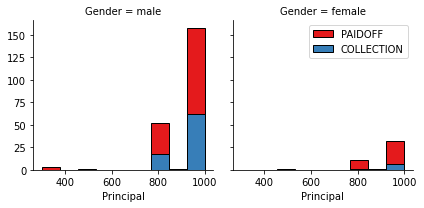

In [6]:
#Visualize dataset with Seaborn (gender, principal, loan status)
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

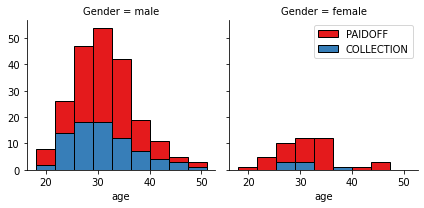

In [7]:
#Visualize dataset with Seaborn (gender, age, loan status)
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

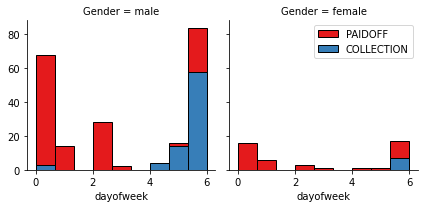

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,0
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,0


In [8]:
#create a day of the week
df['dayofweek'] = df['effective_date'].dt.dayofweek

#Visualize dataset with Seaborn (gender, day of week, loan status)
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

#create a weekend binary variable if day of the week is > 4 (0- Mon, 1- Tues, 2- Wed, 3- Thu, 4-Fri, 5- Sat, 6-Sun)
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>4)  else 0)
df.head()

### Converting categorical to binary variables 

In [9]:
#converting sex categorical variable into 0 for for male and 1 for female
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#converting the loan categorical variable into 0 for PAIDOFF and 1 for COLLECTION
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

#using inplace to ensure the dataframe is overwritten with this new binary classification
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,0
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,0


In [10]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              0              0.750000
                      1              0.250000
High School or Below  0              0.741722
                      1              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               0              0.765101
                      1              0.234899
Name: loan_status, dtype: float64

In [11]:
#Assign all features we want to a new dataframe
Feature = df[['Principal','terms','age','Gender','weekend']]
#use one hot encoding technique to conver categorical varables to binary variables and append them to the feature dataframe
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature.head()
Feature.shape

EducationDummies = pd.get_dummies(df[['education']])
EducationDummies.shape

Feature = pd.concat([Feature,EducationDummies], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,0,0,0,0,1
4,1000,30,29,0,0,0,0,0,1


### Converting the feature set into normalized values

In [12]:
#Putting everything in a new dataframe, because a lot of data manipulation will happen
X = Feature
y = df['loan_status'].values

#Ensuring they are still compatibly shaped
X.shape
y.shape

(346,)

In [13]:
#Normalizing the features using scikit-learn
X = preprocessing.StandardScaler().fit(X).transform(X)

# Classification

The actual classification algorithms start from here.

    K Nearest Neighbor(KNN)
    Decision Tree
    Support Vector Machine
    Logistic Regression


## K-Nearest Neighbour (KNN)

In [14]:
#import additional required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [15]:
#splitting my dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42) #42 being the answer to life, the universe and everything
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


In [16]:
#model using KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.7714285714285715


In [17]:
#find out how many neighbors is the best by running a loop
#important to prevent overfitting (neighbours too high) or underfitting (neighbours too low)
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    # compute train and test set model accuracy
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)


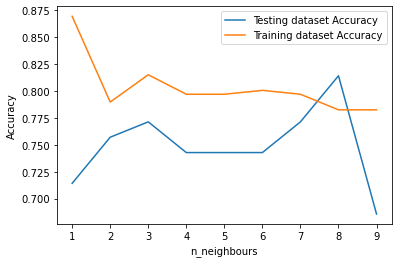

In [18]:
#Visualize neighbour count accuracies
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbours')
plt.ylabel('Accuracy')
plt.show()

In [93]:
#Visually, I have shown that 8 neighbours is the best amount of neighbours for this dataset

#model using KNN
knn_final_model = KNeighborsClassifier(n_neighbors=8)
knn_final_model.fit(X_train,y_train)

from sklearn.metrics import f1_score
knn_yhat = knn_final_model.predict(X_test)

# Calculate the accuracy of the model
print("The best model is 8 neighbours, resulting in an accuracy score of ", knn_final_model.score(X_test, y_test), "an F1-Score of", f1_score(y_test, knn_yhat, average='weighted') )

The best model is 8 neighbours, resulting in an accuracy score of  0.8142857142857143 an F1-Score of 0.7434666666666667


## Decision Tree

In [20]:
#important any additional required packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [21]:
#sklearn's decision tree cannot work with categorical data, however I have already transformed everything into numerical or binary
#splitting everything into training or testing (could be skipped, because I have done it before)

#I am switching y back into categorical, in order to understand the output better
#converting the loan categorical variable into 0 for PAIDOFF and 1 for COLLECTION
#Creates errors later in the code
#df['loan_status'].replace(to_replace=[0,1], value=['PAIDOFF','COLLECTION'],inplace=True)
#y = df['loan_status'].values

print(y)

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_trainset is", X_trainset.shape, "and y_trainset is", y_trainset.shape )
print("X_testset is", X_testset.shape, "and y_testset is", y_testset.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
X_trainset is (276, 9) and y_trainset is (276,)
X_testset is (70, 9) and y_testset is (70,)


In [22]:
#model using DecisionTree
paymentTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
paymentTree # it shows the default parameters
paymentTree.fit(X_trainset,y_trainset)

#Calculate the accuracy of my tree
print(paymentTree.score(X_testset, y_testset))

0.8


In [23]:
#find out how many nodes is the best by running a loop
#important to prevent overfitting (nodes too high) or underfitting (nodes too low)

nodes = np.arange(1, 10)
train_accuracy = np.empty(len(nodes))
test_accuracy = np.empty(len(nodes))

for i, k in enumerate(nodes):
    paymentTree = DecisionTreeClassifier(criterion="entropy", max_depth = k)
    paymentTree.fit(X_train,y_train)
    
    # compute train and test set model accuracy
    train_accuracy[i] = paymentTree.score(X_train,y_train)
    test_accuracy[i] = paymentTree.score(X_test,y_test)

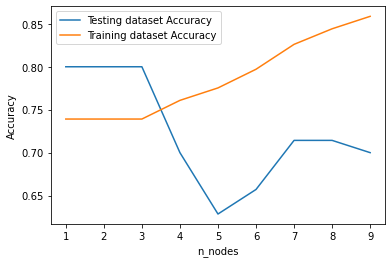

In [24]:
#Visualize the accuracy levels of different node counts

plt.plot(nodes, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(nodes, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_nodes')
plt.ylabel('Accuracy')
plt.show()

In [25]:
#Visually, I have shown that 2 or 3 nodes is the best amount of nodes for this dataset

#model using Decision Tree
paymentTree_final_model = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
paymentTree_final_model # it shows the default parameters
paymentTree_final_model.fit(X_trainset,y_trainset)

# Calculate the accuracy of the model
print("The best model has 3 nodes, resulting in an accuracy score of ", paymentTree_final_model.score(X_test, y_test), "an F1-Score of", paymentTree_final_model. )
#str(np.unique(y_trainset))

The best model has 3 nodes, resulting in an accuracy score of  0.8


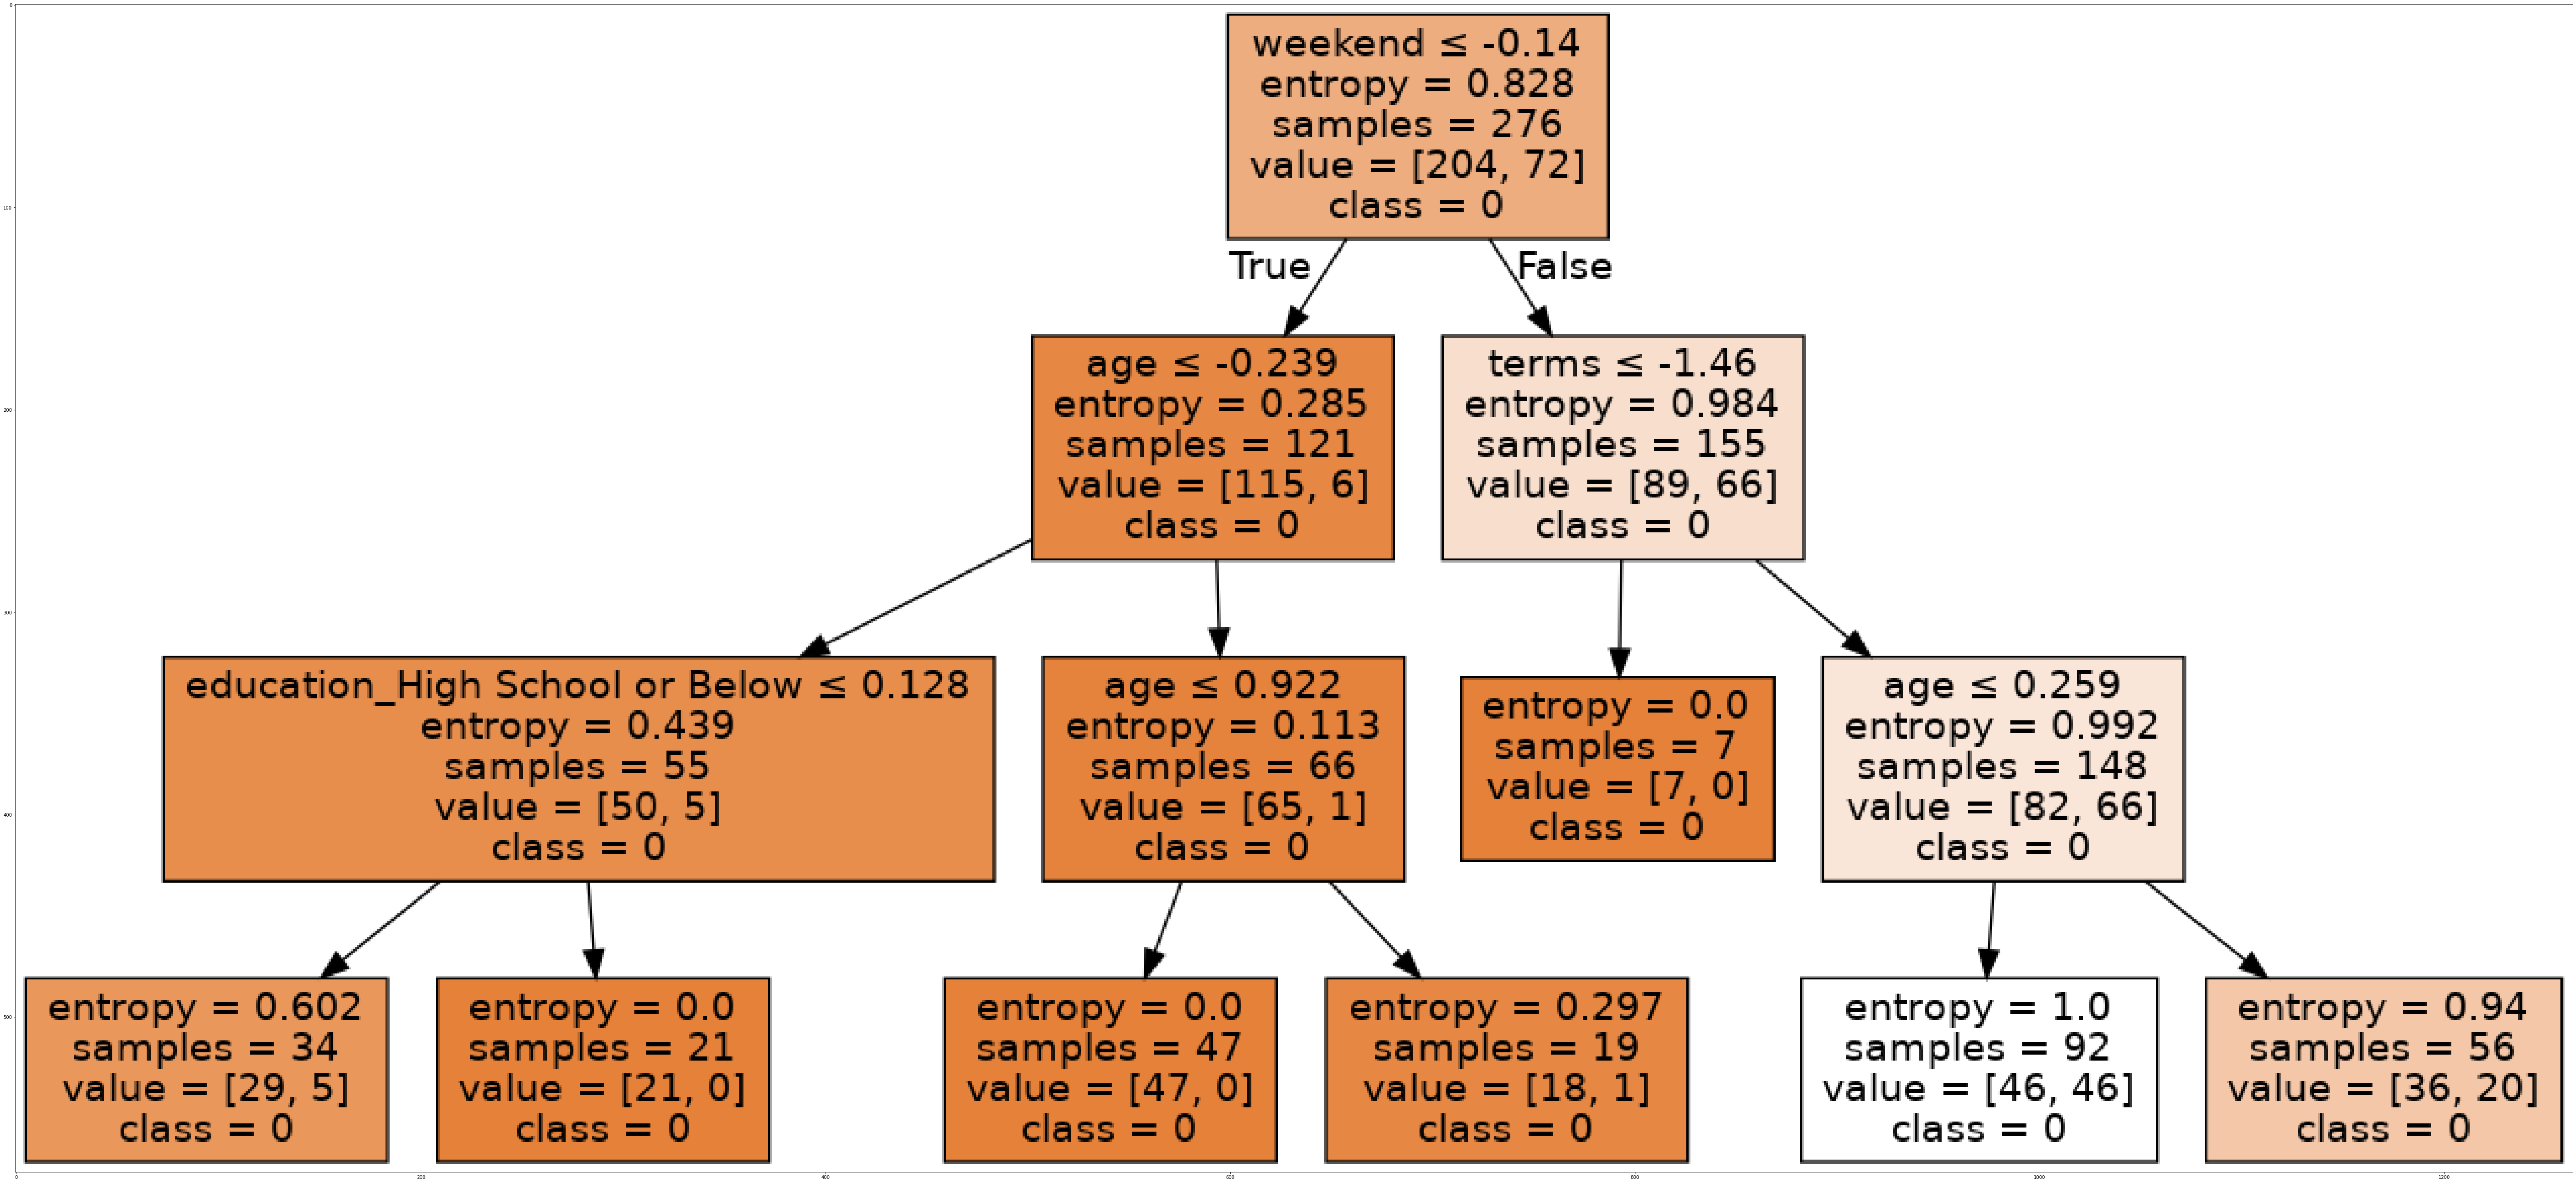

In [95]:
#Visualize the best model with 3 nodes
#!conda install -c conda-forge pydotplus -y #can be commented out if already installed
#!conda install -c conda-forge python-graphviz -y #can be commented out if already installed

from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

dot_data = StringIO()
filename = "paymentTree_final_model.png"
featureNames = Feature.columns[0:9]
out=tree.export_graphviz(paymentTree_final_model,feature_names=featureNames, out_file=dot_data, class_names= [str(0),str(1)], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Support Vector Machines

In [27]:
# install any additional required packages
from sklearn import svm

In [28]:
#split into training and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 9) (242,)
Test set: (104, 9) (104,)


In [29]:
#first you have to do kernerling. this is the way to map data into a higher dimension, which would then allow a nice seperator to be made
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 

SVC(kernel='sigmoid')

In [30]:
#now we can use the model to predict new values
yhat = clf.predict(X_test)
yhat [0:20]

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [31]:
#now we can evaluate our model with that specific kernel
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        82
           1       0.17      0.14      0.15        22

    accuracy                           0.67       104
   macro avg       0.47      0.48      0.47       104
weighted avg       0.65      0.67      0.66       104



Confusion matrix, without normalization
[[67 15]
 [19  3]]


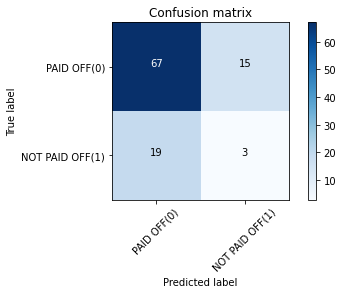

In [34]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAID OFF(0)','NOT PAID OFF(1)'],normalize= False,  title='Confusion matrix') 

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 


0.6606227106227107

In [36]:
#and the jaccard index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.6633663366336634

In [37]:
#now, let us find out which kerneling method is the best, by focusing on the f1_score

svm_kernel_method = ["linear","poly","rbf","sigmoid"]
svm_kernel_train_accuracy = np.empty(len(svm_kernel_method))
svm_kernel_test_accuracy = np.empty(len(svm_kernel_method))

for i, svm_kernel_method in enumerate(svm_kernel_method):
    clf = svm.SVC(kernel=svm_kernel_method)
    clf.fit(X_train, y_train)
    
    yhat = clf.predict(X_test)
    
    # compute train and test set model accuracy
    #svm_kernel_train_accuracy[i] = knn.score(X_train,y_train)
    svm_kernel_test_accuracy[i] = f1_score(y_test, yhat, average='weighted')

In [38]:
#Using the f1_score, we found out that the rbf kerneling method is best
print(svm_kernel_test_accuracy)


[0.66 0.67 0.68 0.66]


In [39]:
#let us set the kerneling method rbf as our final model
final_clf = svm.SVC(kernel='rbf')
final_clf.fit(X_train, y_train)

SVC()

In [40]:
#using that final model, let us predict
yhat = final_clf.predict(X_test)
yhat [0:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        82
           1       0.20      0.14      0.16        22

    accuracy                           0.70       104
   macro avg       0.49      0.50      0.49       104
weighted avg       0.66      0.70      0.68       104

Confusion matrix, without normalization
[[67 15]
 [19  3]]


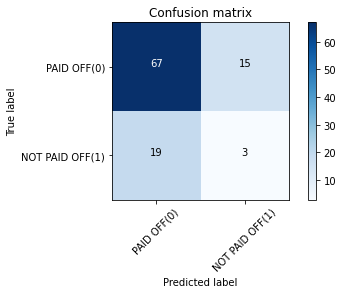

In [41]:
#let us have a look at the confusion matrix for our final model
# Compute confusion matrix
final_cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat))

#show it nicely
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAID OFF(0)','NOT PAID OFF(1)'],normalize= False,  title='Confusion matrix') 

## Logistic Regression

In [42]:
#Get any additional packages that are needed
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import jaccard_score

In [43]:
#X and y are already numerical, which is needed for Logistic Regression

In [44]:
#you know the drill: split into a training and a test set

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


In [87]:
#Now create the actual LR model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [88]:
#now use our LR model to predict using our test set
yhat_lr_model = LR.predict(X_test)
yhat_lr_model

#probabilities of being correct accourding to our model
yhat_lr_model_prob = LR.predict_proba(X_test)
#yhat_lr_model_prob


Confusion matrix, without normalization
[[46 10]
 [11  3]]


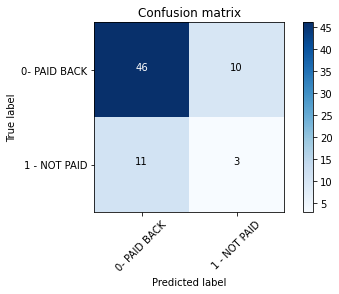

In [89]:
#Jaccard score
jaccard_score(y_test, yhat_lr_model,pos_label=0)

# Compute confusion matrix
cnf_matrix_lr_model = confusion_matrix(y_test, yhat_lr_model, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_lr_model, classes=['0- PAID BACK','1 - NOT PAID'],normalize= False,  title='Confusion matrix')

In [90]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_lr_model_prob)

0.5742600009818299

In [91]:
#Lets's create the final logistic regression model
LR_final_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

# Testing

Actual testing via a third dataset starts here

In [50]:
#make sure we have all the libraries
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [51]:
#get the test dataset
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv


--2021-08-16 07:30:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-08-16 07:30:59 (61.2 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [52]:
#put the dataset into a nice pandaframe
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [53]:
#Convert any dates into proper dates
test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-08,2016-10-07,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-08,2016-09-22,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-09,2016-10-08,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-09,2016-10-08,29,Bechalor,male


In [54]:
#create a day of the week
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

#create a weekend binary variable if day of the week is > 4 (0- Mon, 1- Tues, 2- Wed, 3- Thu, 4-Fri, 5- Sat, 6-Sun)
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>4)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-08,2016-10-07,35,Master or Above,male,3,0
2,21,21,PAIDOFF,1000,30,2016-09-08,2016-09-22,43,High School or Below,female,3,0
3,24,24,PAIDOFF,1000,30,2016-09-09,2016-10-08,26,college,male,4,0
4,35,35,PAIDOFF,800,15,2016-09-09,2016-10-08,29,Bechalor,male,4,0


In [55]:
#converting sex categorical variable into 0 for for male and 1 for female
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#converting the loan categorical variable into 0 for PAIDOFF and 1 for COLLECTION
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

#using inplace to ensure the dataframe is overwritten with this new binary classification
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,0,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,0,300,7,2016-09-08,2016-10-07,35,Master or Above,0,3,0
2,21,21,0,1000,30,2016-09-08,2016-09-22,43,High School or Below,1,3,0
3,24,24,0,1000,30,2016-09-09,2016-10-08,26,college,0,4,0
4,35,35,0,800,15,2016-09-09,2016-10-08,29,Bechalor,0,4,0


In [56]:
#Assign all features we want to a new dataframe
Test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
#use one hot encoding technique to conver categorical varables to binary variables and append them to the feature dataframe
Test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
Test_Feature.head()
Test_Feature.shape

Test_EducationDummies = pd.get_dummies(test_df[['education']])
Test_EducationDummies.shape

Test_Feature = pd.concat([Test_Feature,Test_EducationDummies], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Test_Feature.head()

,Principal,terms,age,Gender,weekend,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,1000,30,50,1,0,1,0,0,0
1,300,7,35,0,0,0,0,1,0
2,1000,30,43,1,0,0,1,0,0
3,1000,30,26,0,0,0,0,0,1
4,800,15,29,0,0,1,0,0,0


In [96]:
#Putting everything in a new dataframe, because a lot of data manipulation will happen
testing_X = Test_Feature
testing_y = test_df['loan_status'].values

#Normalizing the data
testing_X = preprocessing.StandardScaler().fit(testing_X).transform(testing_X)

#Ensuring they are still compatibly shaped
print(testing_X.shape)
print(testing_y.shape)

(54, 9)
(54,)


In [70]:
#final table

results_df = pd.DataFrame(columns = ['Algorithm','Jaccard', 'F1-Score', 'LogLoss'])

clf_yhat = final_clf.predict(testing_X)
LR_yhat = LR_final_model.predict(testing_X)
LR_model_prob = LR_final_model.predict_proba(testing_X)
knn_yhat = knn_final_model.predict(testing_X)
decision_tree_yhat = paymentTree_final_model.predict(testing_X)

clf_jaccard = jaccard_score(testing_y, clf_yhat,pos_label=0)
clf_f1 = f1_score(testing_y, clf_yhat, average='weighted') 
clf_logloss = "n/a"

LR_jaccard = jaccard_score(testing_y, LR_yhat,pos_label=0)
LR_f1 = f1_score(testing_y, LR_yhat, average='weighted')
LR_log_loss = log_loss(testing_y, LR_model_prob)

knn_jaccard = jaccard_score(testing_y, knn_yhat,pos_label=0)
knn_f1 = f1_score(testing_y, knn_yhat, average='weighted')
knn_log_loss = "n/a"

decision_tree_jaccard = jaccard_score(testing_y, decision_tree_yhat,pos_label=0)
decision_tree_f1 = f1_score(testing_y, decision_tree_yhat, average='weighted')
decision_tree_log_loss = "n/a"

new_row = {'Jaccard':clf_jaccard, 'F1-Score':clf_f1, 'LogLoss':clf_logloss, 'Algorithm':"Support Vector Machine CLF"}
results_df = results_df.append(new_row, ignore_index=True)

new_row = {'Jaccard':LR_jaccard, 'F1-Score':LR_f1, 'LogLoss':LR_log_loss, 'Algorithm':"Logistic Regression"}
results_df = results_df.append(new_row, ignore_index=True)

new_row = {'Jaccard':knn_jaccard, 'F1-Score':knn_f1, 'LogLoss':knn_log_loss, 'Algorithm':"KNN"}
results_df = results_df.append(new_row, ignore_index=True)

new_row = {'Jaccard':decision_tree_jaccard, 'F1-Score':decision_tree_f1, 'LogLoss':decision_tree_log_loss, 'Algorithm':"Decision Tree"}
results_df = results_df.append(new_row, ignore_index=True)

                    Algorithm   Jaccard  F1-Score    LogLoss
0  Support Vector Machine CLF  0.740741  0.630418        n/a
1           Linear Regression  0.000000  0.106754  12.383109
2                         KNN  0.740741  0.630418        n/a
3               Decision Tree  0.740741  0.630418        n/a


In [ ]:
#Presenting the final results
print(results_df)